This notebook is the opposite of the 1st one in linear regression. This is google based on meta's stock.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt


In [4]:
# Load Google and Meta data
google_data = pd.read_csv("../GOOGL_stock_data.csv", parse_dates=["Date"])
meta_data = pd.read_csv("../META_stock_data.csv", parse_dates=["Date"])

# Create lag features and moving averages for Meta data
meta_data["Lag_1_meta"] = meta_data["Close"].shift(1)
meta_data["Lag_2_meta"] = meta_data["Close"].shift(2)
meta_data["50_MA_meta"] = meta_data["Close"].rolling(window=50).mean()
meta_data["200_MA_meta"] = meta_data["Close"].rolling(window=200).mean()

# Drop missing values in Meta data
meta_data.dropna(inplace=True)

# Merge Google and Meta datasets based on dates
combined_data = pd.merge(google_data, meta_data, on="Date", suffixes=("_google", "_meta"))


In [5]:
# Define features (X) and target (y)
X = combined_data[["Lag_1_meta", "Lag_2_meta", "50_MA_meta", "200_MA_meta"]]
y = combined_data["Close_google"]

# Ensure no missing values remain in the combined dataset
print(f"Shape of combined data: {combined_data.shape}")


Shape of combined data: (2935, 17)


In [6]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


Training data: (2348, 4), Testing data: (587, 4)


In [7]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)


In [9]:
# Calculate RMSE and MAPE
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")


RMSE: 32.86075907843338
MAPE: 0.24580052411719497


c:\Users\siwma\Desktop\Uni\cloudaislay\MEM\.venv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


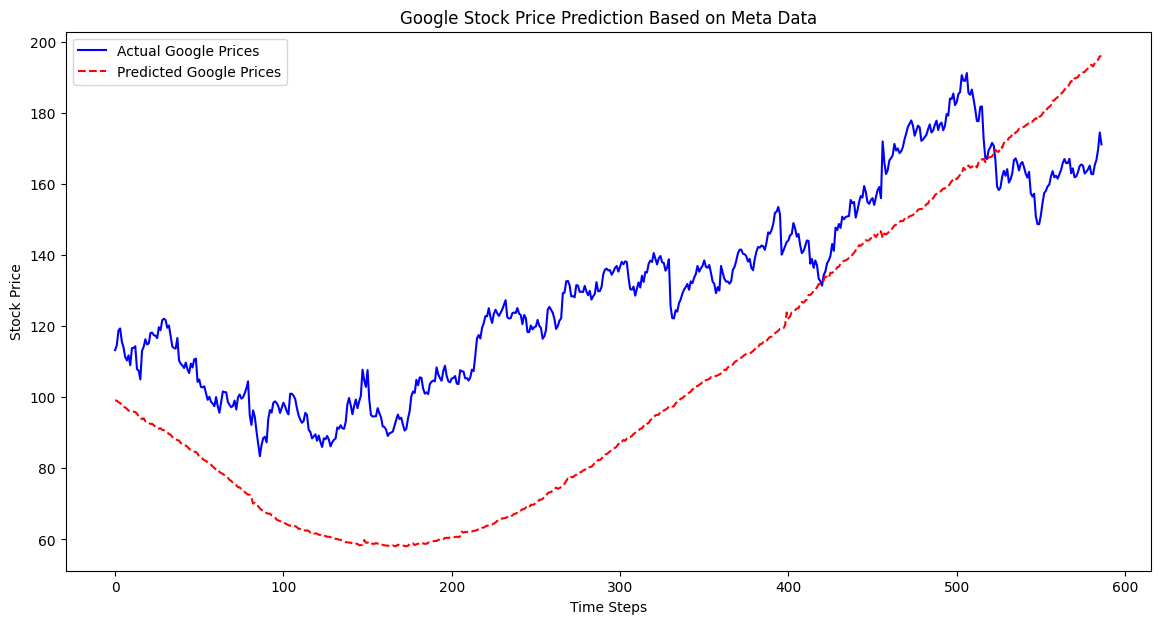

In [10]:
# Plot predictions vs actual prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label="Actual Google Prices", color="blue")
plt.plot(y_pred, label="Predicted Google Prices", color="red", linestyle="--")
plt.title("Google Stock Price Prediction Based on Meta Data")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


this data shows **significantly worse** performance compared to the reverse scenario. The model struggles to capture the actual stock price trends. The predicted values follow a simplistic linear pattern, failing to align with the more dynamic structure nature of the actual prices. Probably due to a weaker correlation. 